# 1 决策树算法
Random Forest、Adaboost、GBDT 集成学习算法总结

## 1.1 Bagging
Bagging 全称叫 Bootstrap aggregating，每个基学习器都会对训练集进行有放回抽样得到子训练集，比较著名的采样法为 0.632 自助法。每个基学习器基于不同子训练集进行训练，并综合所有基学习器的预测值得到最终的预测结果。Bagging 常用的综合方法是投票法，票数最多的类别为预测类别。
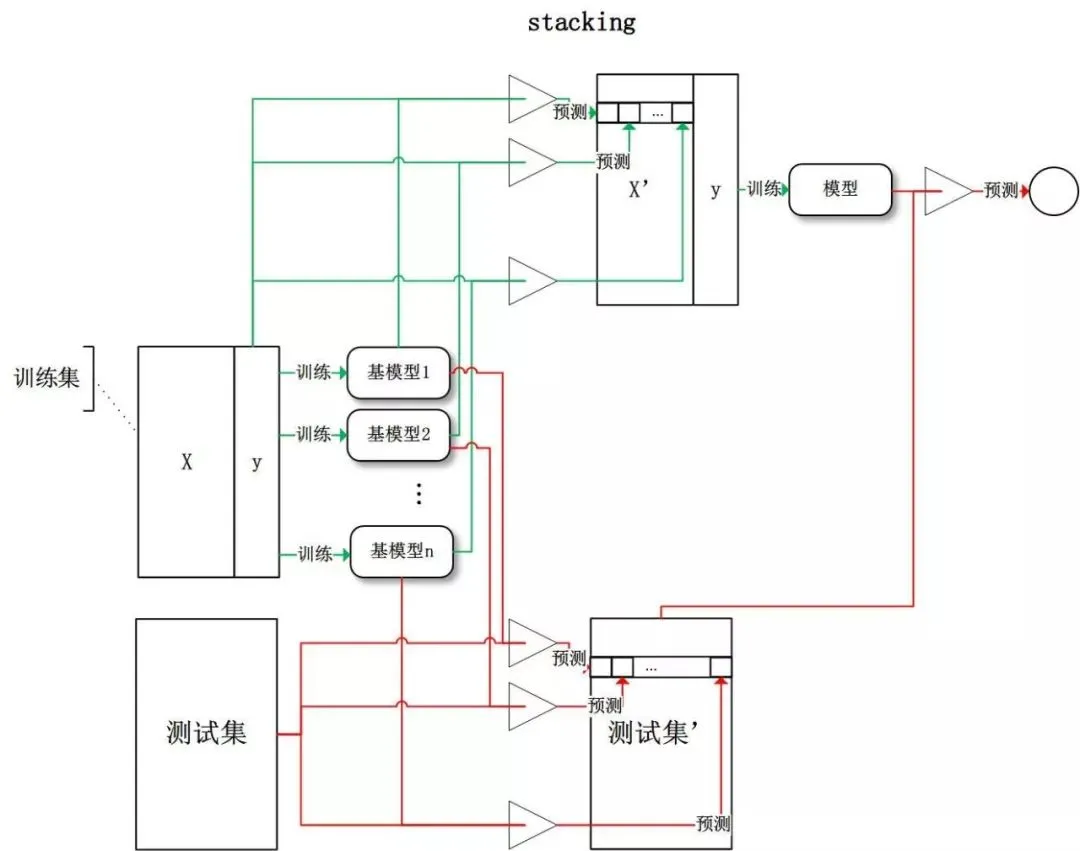
## 1.2 Boosting
Boosting 训练过程为阶梯状，基模型的训练是有顺序的，每个基模型都会在前一个基模型学习的基础上进行学习，最终综合所有基模型的预测值产生最终的预测结果，用的比较多的综合方式为加权法。
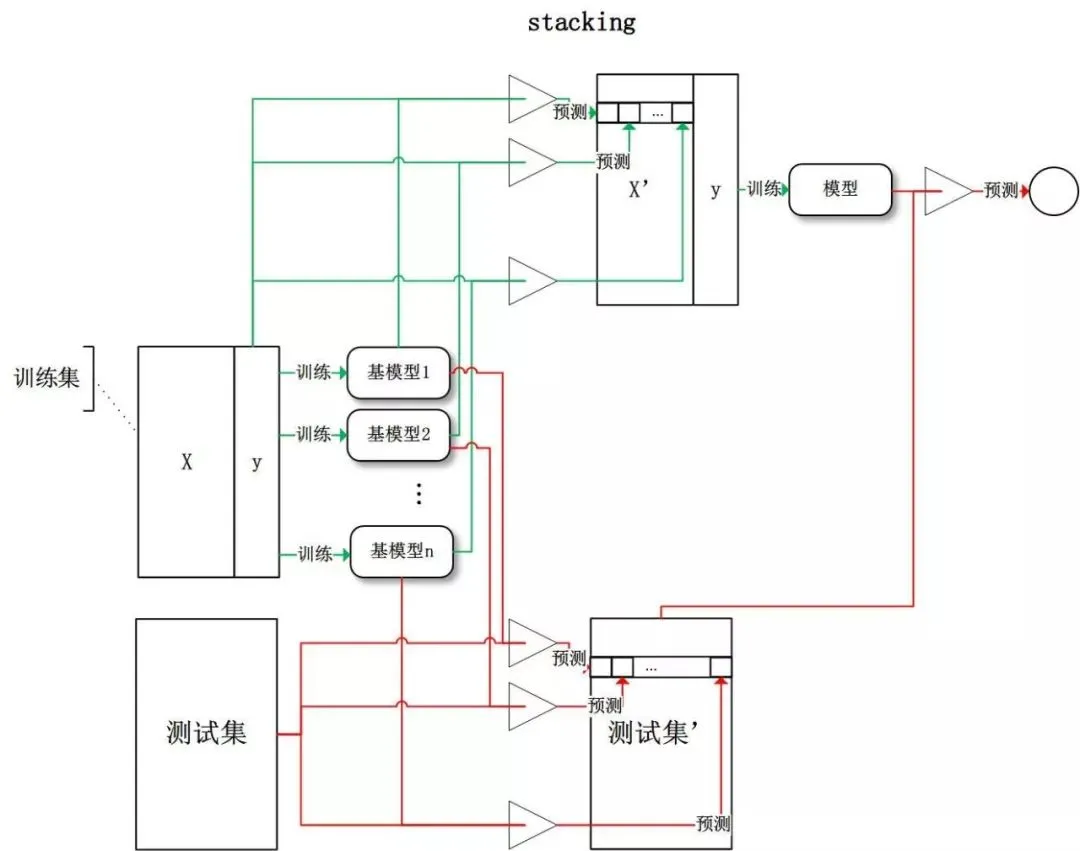
## 1.3 Stacking
Stacking 是先用全部数据训练好基模型，然后每个基模型都对每个训练样本进行的预测，其预测值将作为训练样本的特征值，最终会得到新的训练样本，然后基于新的训练样本进行训练得到模型，然后得到最终预测结果。
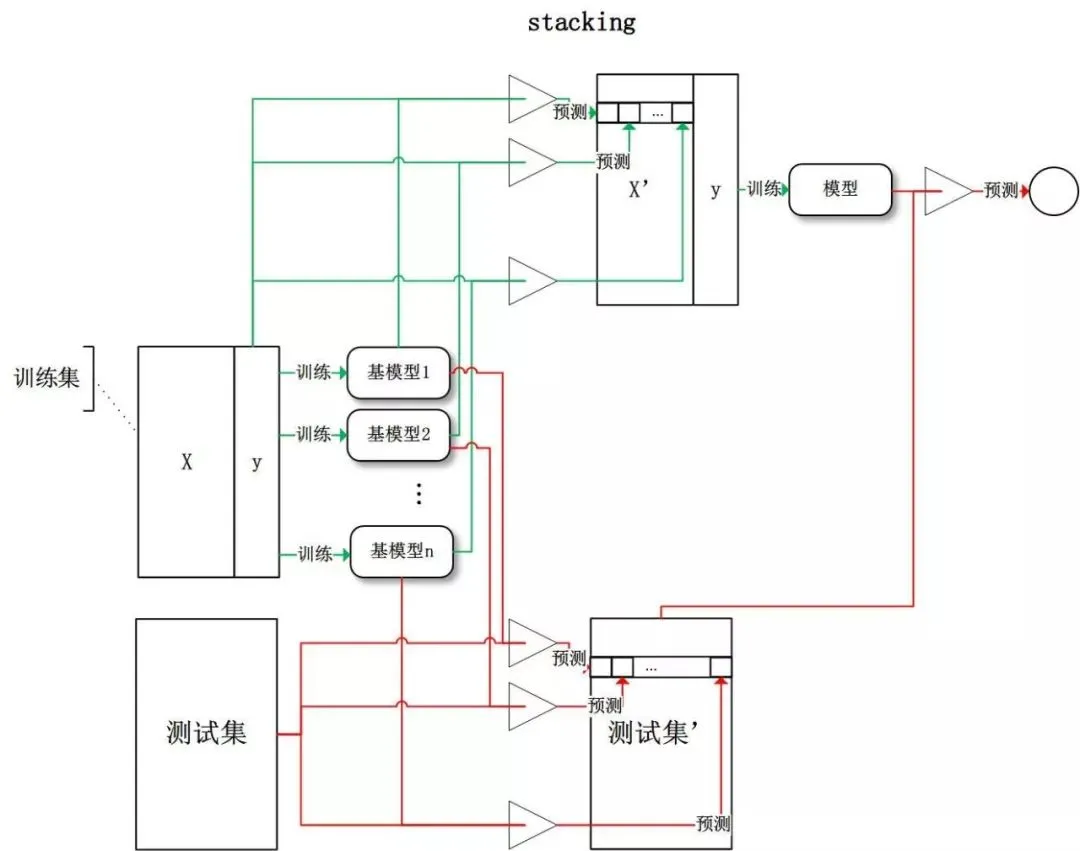
集成学习会好于单个学习器原因可能有三：

1. 训练样本可能无法选择出最好的单个学习器，由于没法选择出最好的学习器，所以干脆结合起来一起用；
2. 假设能找到最好的学习器，但由于算法运算的限制无法找到最优解，只能找到次优解，采用集成学习可以弥补算法的不足；
3. 可能算法无法得到最优解，而集成学习能够得到近似解。比如说最优解是一条对角线，而单个决策树得到的结果只能是平行于坐标轴的，但是集成学习可以去拟合这条对角线。


# 2 偏差与方差
1. 偏差（Bias）描述的是预测值和真实值之差
2. 方差（Variance）描述的是预测值作为随机变量的离散程度。经典的图
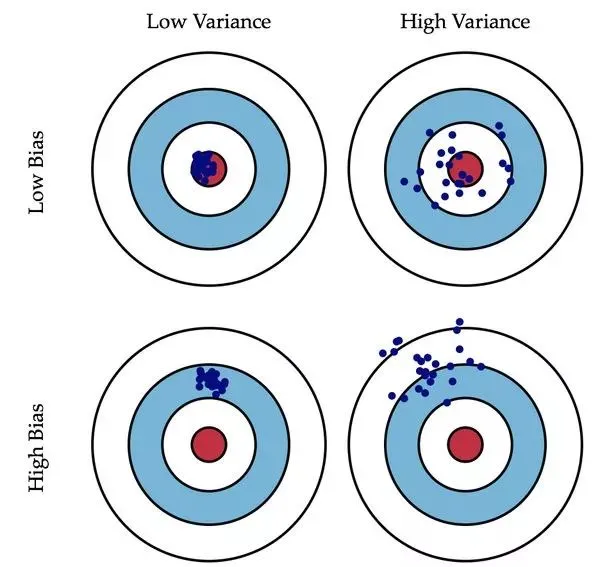
## 2.1 模型的偏差与方差
1. 偏差：描述样本拟合出的模型的预测结果的期望与样本真实结果的差距，要想偏差表现的好，就需要复杂化模型，增加模型的参数，但这样容易过拟合，过拟合对应上图的 High Variance，点会很分散。低偏差对应的点都打在靶心附近，所以瞄的很准，但不一定很稳；
2. 方差：描述样本上训练出来的模型在测试集上的表现，要想方差表现的好，需要简化模型，减少模型的复杂度，但这样容易欠拟合，欠拟合对应上图 High Bias，点偏离中心。低方差对应就是点都打的很集中，但不一定是靶心附近，手很稳，但不一定瞄的准。
集成学习中的基模型是弱模型，通常来说弱模型是偏差高（在训练集上准确度低）方差小（防止过拟合能力强）的模型。但是，并不是所有集成学习框架中的基模型都是弱模型。Bagging 和 Stacking 中的基模型为强模型（偏差低方差高），Boosting 中的基模型为弱模型。
在 Bagging 和 Boosting 框架中，通过计算基模型的期望和方差我们可以得到模型整体的期望和方差。为了简化模型，我们假设基模型的权重 、方差 及两两间的相关系数 相等。由于 Bagging 和 Boosting 的基模型都是线性组成的，那么有：
模型总体期望：
$$
\begin{aligned}
E(F) &=E\left(\sum_{i}^{m} r_{i} f_{i}\right) \\
&=\sum_{i}^{m} r_{i} E\left(f_{i}\right) \\
&=r \sum_{i}^{m} E\left(f_{i}\right)
\end{aligned}
$$
模型总体方差：
$$
\begin{aligned}
\operatorname{Var}(F) &=\operatorname{Var}\left(\sum_{i}^{m} r_{i} f_{i}\right) \\
&=\operatorname{Cov}\left(\sum_{i}^{m} r_{i} f_{i}, \sum_{i}^{m} r_{i} f_{i}\right) \\
&=\sum_{i}^{m} r_{i}{ }^{2} \operatorname{Var}\left(f_{i}\right)+\sum_{i}^{m} \sum_{j \neq i}^{m} 2 \rho r_{i} r_{j} \sqrt{\operatorname{Var}\left(f_{i}\right)} \sqrt{\operatorname{Var}\left(f_{j}\right)} \\
&=m^{2} r^{2} \sigma^{2} \rho+m r^{2} \sigma^{2}(1-\rho)
\end{aligned}
$$
## 2.2 Bagging 的偏差与方差
对于 Bagging 来说，每个基模型的权重等于 1/m 且期望近似相等（子训练集都是从原训练集中进行子抽样），故我们可以进一步化简得到：
$$
\begin{aligned}
E(F) &=E\left(\sum_{i}^{m} r_{i} f_{i}\right) \\
&=\frac{1}{m} m \mu \\
&=\mu \\
\operatorname{Var}(F) &=m^{2} r^{2} \sigma^{2} \rho+m r^{2} \sigma^{2}(1-\rho) \\
&=m^{2} \frac{1}{m^{2}} \sigma^{2} \rho+m \frac{1}{m^{2}} \sigma^{2}(1-\rho) \\
&=\sigma^{2} \rho+\frac{\sigma^{2}(1-\rho)}{m}
\end{aligned}
$$
从上式分析可知
整体模型的期望等于基模型的期望，这也就意味着整体模型的偏差和基模型的偏差近似。
整体模型的方差小于等于基模型的方差，当且仅当相关性为 1 时取等号，随着基模型数量增多，整体模型的方差减少，从而防止过拟合的能力增强，模型的准确度得到提高。但是，模型的准确度一定会无限逼近于 1 吗？并不一定，当基模型数增加到一定程度时，方差公式第一项的改变对整体方差的作用很小，防止过拟合的能力达到极限，这便是准确度的极限了。
 Bagging 中的基模型一定要为强模型，如果 Bagging 使用弱模型则会导致整体模型的偏差提高，而准确度降低。Random Forest 是经典的基于 Bagging 框架的模型，并在此基础上通过引入特征采样和样本采样来降低基模型间的相关性，在公式中显著降低方差公式中的第二项，略微升高第一项，从而使得整体降低模型整体方差。
 ## 2.3 Boosting 的偏差与方差
 对于 Boosting 来说，基模型的训练集抽样是强相关的，那么模型的相关系数近似等于 1，故我们也可以针对 Boosting 化简公式为：
 $$
\begin{aligned}
E(F) &=\mu E\left(\sum_{i}^{m} r_{i} f_{i}\right) \\
\operatorname{Var}(F) &=m^{2} r^{2} \sigma^{2} \rho+m r^{2} \sigma^{2}(1-\rho) \\
&=m^{2} \frac{1}{m^{2}} \sigma^{2} 1+m \frac{1}{m^{2}} \sigma^{2}(1-1) \\
&=m^{2} r^{2} \sigma^{2}
\end{aligned}
$$
通过观察整体方差的表达式我们容易发现：